# **Nama : Damar Galih**
# **NIM  : 22.11.5209**

## **Multiple Linear Regression.**

Jika simple linear regression hanya melibatkan satu variabel bebas , maka Multiple Linear Regression adalah linear regression yang
melibatkan lebih dari satu variabel bebas x.

## **Dataset**

Import library yang dibutuhkan terlebih dahulu seperti Pandas, Numpy, Matplotlib, dan Seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 Load dataset ke dalam dataframe Pandas dengan read_csv() .

In [2]:
# Definisikan format missing values yang mungkin ada
missing_value_format = ['N.A', 'na', 'n.a.', 'n/a', '?', '-']
# Load dataset
df = pd.read_csv('/content/Automobile_data.csv', header=None, na_values=missing_value_format)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450
6,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875


Pemberian nama kolom yang merepresentasikan kolom tersebut.

In [3]:
# Membuat list nama kolom
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
# Mengubah nama kolom
df.columns = column_names
pd.set_option('display.max_columns', 100) # Menampilkan seluruh kolom
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950


## **Analisis dan visualisasi data**

Cek info dataframe.

In [4]:
# Cek info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          206 non-null    object
 1   normalized-losses  165 non-null    object
 2   make               206 non-null    object
 3   fuel-type          206 non-null    object
 4   aspiration         206 non-null    object
 5   num-of-doors       204 non-null    object
 6   body-style         206 non-null    object
 7   drive-wheels       206 non-null    object
 8   engine-location    206 non-null    object
 9   wheel-base         206 non-null    object
 10  length             206 non-null    object
 11  width              206 non-null    object
 12  height             206 non-null    object
 13  curb-weight        206 non-null    object
 14  engine-type        206 non-null    object
 15  num-of-cylinders   206 non-null    object
 16  engine-size        206 non-null    object
 1

Tampilkan deskripsi statistik untuk kolom numerik
pada dataframe tersebut dengan describe() .

In [5]:
# Menampilkan deskripsi statistik
df.describe()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,206,165,206,206,206,204,206,206,206,206,206,206,206,206,206,206,206,206,202,202,206,204,204,206,206,202
unique,7,52,23,3,3,3,6,4,3,54,76,45,50,172,8,8,45,9,39,37,33,60,24,30,31,187
top,0,161,toyota,gas,std,four,sedan,fwd,front,94.5,157.3,63.8,50.8,2385,ohc,four,92,mpfi,3.62,3.4,9,68,5500,31,25,8921
freq,67,11,32,185,168,114,96,120,202,21,15,24,14,4,148,159,15,94,23,20,46,19,37,28,19,2


Menampilkan hubungan antarvariabel price dan horsepower .

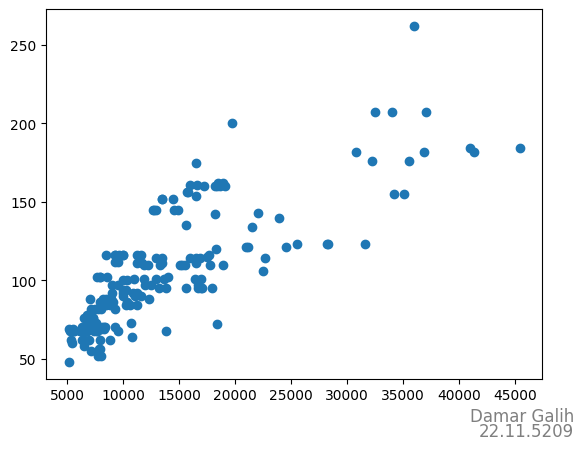

In [7]:
# Scatter plot kolom 'price' dan 'horsepower'
# Convert 'price' and 'horsepower' columns to numeric type
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
# Scatter plot kolom 'price' dan 'horsepower'
plt.scatter(df['price'], df['horsepower'])
fig = plt.gcf()
fig.text(0.95, 0.05, 'Damar Galih', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
fig.text(0.95, 0.02, '22.11.5209', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
plt.show()

Melihat visualisasi dari empat variabelnya.

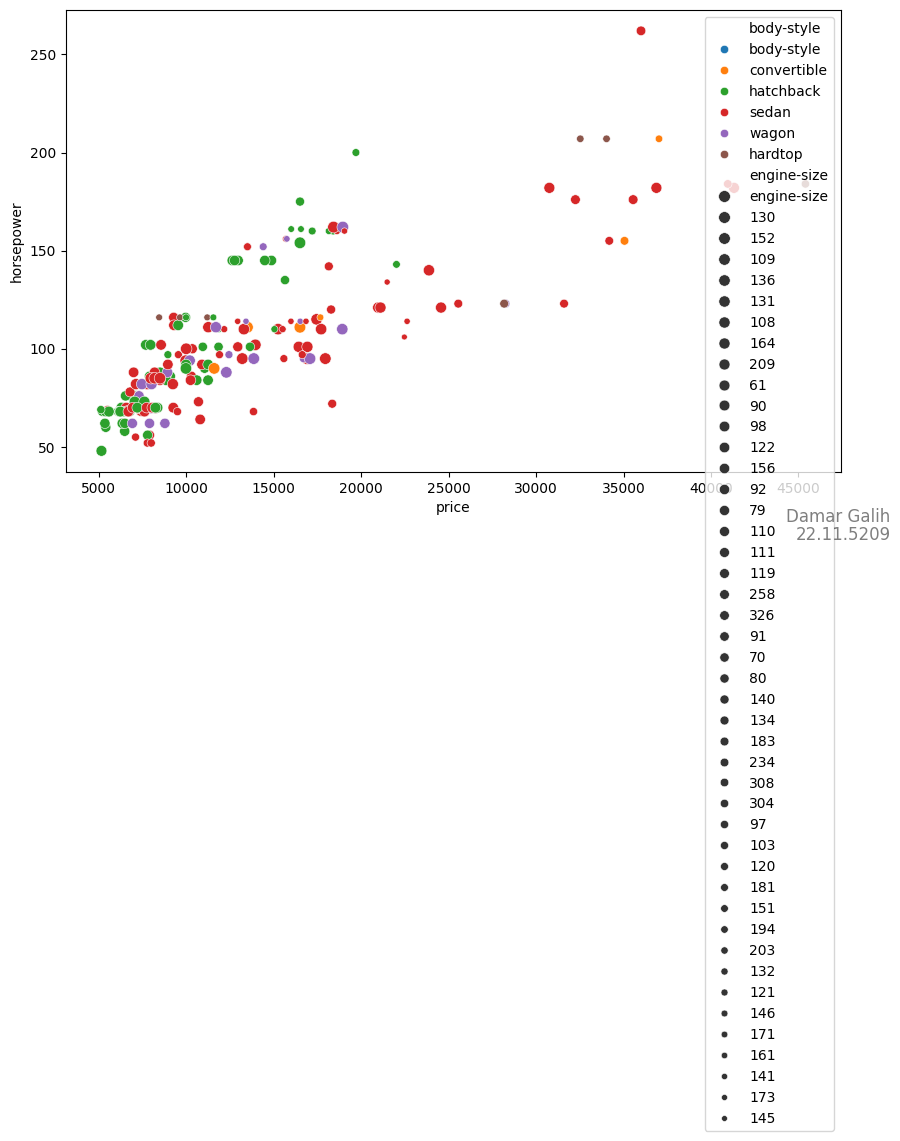

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='horsepower', hue='body-style', size='engine-size')
fig = plt.gcf()
fig.text(0.95, 0.05, 'Damar Galih', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
fig.text(0.95, 0.02, '22.11.5209', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
plt.show()

Tampilkan countplot dari make dan body-style .

<ipython-input-11-7e8c20598041>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='make', data=df, palette='Set2', ax=ax0)
<ipython-input-11-7e8c20598041>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='body-style', data=df, palette='Set2', ax=ax1)


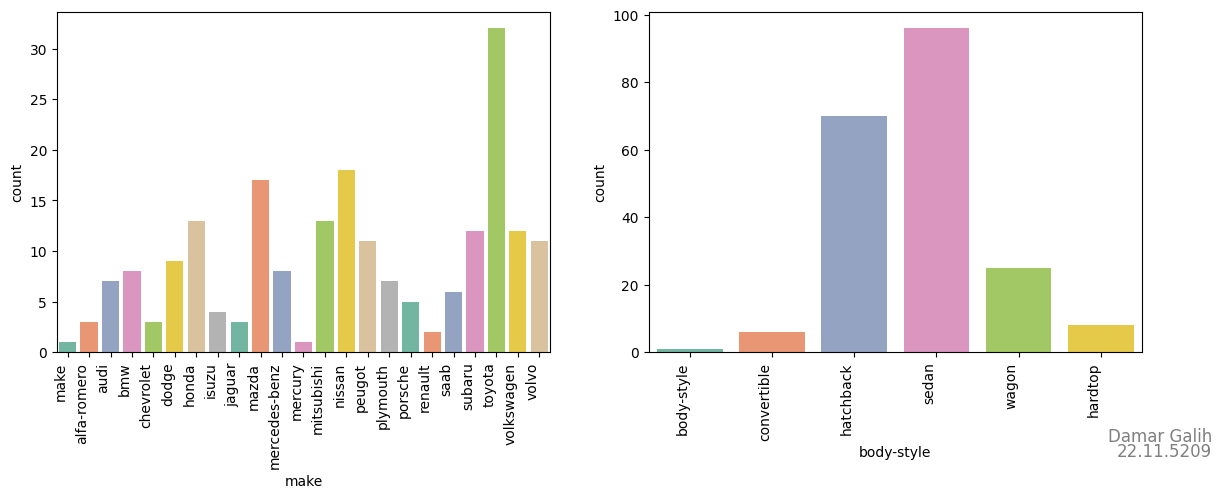

In [11]:
# Menampilkan countplot dari 'make' dan 'body-style'
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))
# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0])
ax1 = fig.add_subplot(ax[1])
sns.countplot(x='make', data=df, palette='Set2', ax=ax0)
sns.countplot(x='body-style', data=df, palette='Set2', ax=ax1)
fig.autofmt_xdate(rotation=90)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
fig = plt.gcf()
fig.text(0.95, 0.05, 'Damar Galih', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
fig.text(0.95, 0.02, '22.11.5209', fontsize=12, color='black',
         ha='right', va='top', alpha=0.5, rotation=0)
plt.show()

## **Data Preparation / Preprocessing**

### Missing values

Menghapus baris data yang mengandung missing values pada kolom price karena kolom tersebut
merupakan kolom target.

In [12]:
# Menghapus baris yang mengandung mising values di kolom price
df.dropna(subset=['price'], axis=0, inplace=True)
# Me-reset indeks karena ada data yang terhapus
df.reset_index(drop=True, inplace=True)

Selanjutnya untuk missing values pada kolom lainnya, kita ganti dengan nilai rata-rata.

In [13]:
# Mengganti missing values dengan 'four' untuk kolom num-of-doors
df['num-of-doors'].fillna('four', inplace=True)
# Mengganti missing values dengan mean-nya untuk kolom lainnya
avg_norm = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, avg_norm, inplace=True)
avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)
avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_bore, inplace=True)
avg_horse = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horse, inplace=True)
avg_peak = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_norm, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111.0,5000,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111.0,5000,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115.0,5500,18,22,17450.0


### Mengubah tipe data

Ubah tipe data dari kolom yang belum sesuai tipenya dengan jenis data pada tiap kolom.

In [14]:
# Konversi tipe data
df[['bore', 'stroke', 'peak-rpm']] = df[['bore', 'stroke', 'peak-rpm']].astype('float')
df[['normalized-losses', 'horsepower']] = df[['normalized-losses', 'horsepower']].astype('int')
df[['price']] = df[['price']].astype('float')

In [15]:
# Cek tipe data
df.dtypes

symboling             object
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base            object
length                object
width                 object
height                object
curb-weight           object
engine-type           object
num-of-cylinders      object
engine-size           object
fuel-system           object
bore                 float64
stroke               float64
compression-ratio     object
horsepower             int64
peak-rpm             float64
city-mpg              object
highway-mpg           object
price                float64
dtype: object

### Encoding

encoding kolom dengan data kategori menjadi numerik. Pisahkan terlebih dahulu data fitur
dan targetnya.

In [16]:
# Mendefinisikan data fitur dan target
df_features = df.drop('price', axis=1)
df_target = df['price']

encoding pada beberapa kolom di df_features dengan OrdinalEncoder() .


In [17]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding data kategori
ord_encode = OrdinalEncoder()
df_features['make'] = ord_encode.fit_transform(df_features[['make']])
df_features['fuel-type'] = ord_encode.fit_transform(df_features[['fuel-type']])
df_features['aspiration'] = ord_encode.fit_transform(df_features[['aspiration']])
df_features['num-of-doors'] = ord_encode.fit_transform(df_features[['num-of-doors']])
df_features['body-style'] = ord_encode.fit_transform(df_features[['body-style']])
df_features['drive-wheels'] = ord_encode.fit_transform(df_features[['drive-wheels']])
df_features['engine-location'] = ord_encode.fit_transform(df_features[['engine-location']])
df_features['engine-type'] = ord_encode.fit_transform(df_features[['engine-type']])
df_features['num-of-cylinders'] = ord_encode.fit_transform(df_features[['num-of-cylinders']])
df_features['fuel-system'] = ord_encode.fit_transform(df_features[['fuel-system']])

Tampilkan dataframe hasil encoding.

In [18]:
# Menampilkan dataframe hasil encoding
df_features[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']].head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
1,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
2,0.0,1.0,0.0,1.0,2.0,2.0,0.0,4.0,3.0,5.0
3,1.0,1.0,0.0,0.0,3.0,1.0,0.0,2.0,2.0,5.0
4,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,5.0
5,1.0,1.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,5.0
6,1.0,1.0,0.0,0.0,3.0,1.0,0.0,2.0,1.0,5.0
7,1.0,1.0,0.0,0.0,4.0,1.0,0.0,2.0,1.0,5.0
8,1.0,1.0,1.0,0.0,3.0,1.0,0.0,2.0,1.0,5.0
9,2.0,1.0,0.0,1.0,3.0,2.0,0.0,2.0,2.0,5.0


### Normalisasi

Normalisasi data dengan StandardScaler() .

In [19]:
from sklearn.preprocessing import StandardScaler
cols = list(df_features.columns)
df_features_scaled = pd.DataFrame(data = df_features)
df_features_scaled[cols] = StandardScaler().fit_transform(df_features[cols])
df_features_scaled.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1.725050,0.000000,-1.971717,0.332411,-0.467099,1.156378,-3.034335,1.213477,-0.123091,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,-2.325124,-0.171457,0.075389,0.867123,0.520894,-1.829927,-0.291435,0.204090,-0.098668,-0.652249,-0.542288
1,1.725050,0.000000,-1.971717,0.332411,-0.467099,1.156378,-3.034335,1.213477,-0.123091,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,-2.325124,-0.171457,0.075389,0.867123,0.520894,-1.829927,-0.291435,0.204090,-0.098668,-0.652249,-0.542288
2,0.127193,0.000000,-1.971717,0.332411,-0.467099,1.156378,-0.715318,1.213477,-0.123091,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,2.136451,1.104946,0.606234,0.867123,-2.433435,0.675938,-0.291435,1.357754,-0.098668,-0.964397,-0.689386
3,0.926121,1.315931,-1.811395,0.332411,-0.467099,-0.864769,0.444190,-0.606739,-0.123091,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.094337,-0.171457,-0.431327,0.867123,-0.526210,0.453899,-0.041121,-0.037374,0.628109,-0.184027,-0.100993
4,0.926121,1.315931,-1.811395,0.332411,-0.467099,-0.864769,0.444190,-2.426955,-0.123091,0.099646,0.195176,0.243744,0.218425,0.520017,-0.094337,-1.447860,0.220165,0.867123,-0.526210,0.453899,-0.541748,0.311408,0.628109,-1.120471,-1.277779


### Train test split

Membagi data menjadi data latih dan data uji dengan train test split. Multiple linear regression berarti
menggunakan lebih dari satu data fitur, jadi disini kita akan menggunakan semua fitur dalam dataset.


In [21]:
from sklearn.model_selection import train_test_split
# Membagi data dengan train test split
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, df_target, test_size=0.2, random_state=45)

Tampilkan 5 data teratas dari X_train dan X_test .

In [23]:
# Menampilkan data X_train dan X_test
print('Train set:', X_train.shape, y_train.shape)
print(X_train.head())
print('\n')
print('Test set:', X_test.shape, y_test.shape)
print(X_test.head())

Train set: (160, 25) (160,)
     symboling  normalized-losses      make  fuel-type  aspiration  \
175   1.725050           2.349877  1.074394   0.332411   -0.467099   
138  -0.671736          -0.626634  0.914073   0.332411   -0.467099   
67   -1.470664          -0.908619 -0.528822  -3.008322    2.140872   
176  -1.470664          -1.002614  1.074394   0.332411   -0.467099   
116   0.127193          -0.093995  0.272786   0.332411    2.140872   

     num-of-doors  body-style  drive-wheels  engine-location  wheel-base  \
175      1.156378   -0.715318      1.213477        -0.123091    0.678039   
138     -0.864769    0.444190     -0.606739        -0.123091   -0.263915   
67      -0.864769    0.444190      1.213477        -0.123091    2.776776   
176     -0.864769    0.444190      1.213477        -0.123091    0.942446   
116      1.156378   -0.715318     -0.606739        -0.123091   -0.842307   

       length     width    height  curb-weight  engine-type  num-of-cylinders  \
175  0.756540

### Modeling

### Linear Regression dengan beberapa variabel bebas

Gunakan package LinearRegression untuk multiple linear regression.

In [29]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Tampilkan coeficients untuk tiap fitur.

In [30]:
# Menampilkan koefisien
lr_model.coef_

array([   77.38378274,  -260.85179152, -1243.48223113,  -503.1686252 ,
         101.41712856,    36.75108824,  -621.3571906 ,   891.39632652,
        1273.29454614,   680.66108837,   -87.98461616,  1544.12644126,
         719.15165268,   482.7664616 ,   325.87313709,  -154.38464061,
        2804.89689708,   -21.01763766,   -67.26140805,  -882.03023251,
          77.61720544,  1734.93859551,   317.63007854, -1065.79025346,
        1090.92598721])

Tampilkan intercept-nya.

In [31]:
# Menampilkan intercept
lr_model.intercept_

13149.418965195553

### Prediksi

Uji model tersebut dengan X_test dan menampilkan hasil prediksinya.

In [32]:
# Menguji model
y_pred = lr_model.predict(X_test)
y_pred

array([28142.65324341, 22029.37729321, 10819.55346565, 12098.60233832,
        6359.31071455, 20672.9344397 , 14079.21000298, 14640.6965233 ,
       12807.61525416, 27954.67585474,  8183.06691907,  4052.75605686,
       18441.88909663,  7877.6914081 , 17684.02883596,  8396.6617022 ,
       16070.25327254, 13112.85649873, 30169.24253093, 16087.55995591,
       15241.30289976,  6314.06173891,  8418.99651166, 10268.25613168,
        9453.2982613 , 14664.87240655, 16018.79643619,  7958.9860239 ,
        8277.87562159,  9801.14792158,  5999.37030501, 15921.4865579 ,
       19090.80933484, 16012.1651963 ,  6669.86322638,  9305.56941672,
       25647.76461998, 10742.42146581, 14047.98621481, 15651.81119836,
       10341.73510816])

### Evaluasi

Evaluasi kinerja model dengan r2_score .

In [33]:
from sklearn.metrics import r2_score
# Menampilkan nilai r2 score
print("R2-score: %.2f" % r2_score(y_pred, y_test))

R2-score: 0.81
